<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-IcaData-object" data-toc-modified-id="Load-IcaData-object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load IcaData object</a></span></li><li><span><a href="#Annotate-iModulons" data-toc-modified-id="Annotate-iModulons-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Annotate iModulons</a></span><ul class="toc-item"><li><span><a href="#Plot-Gene-Weights" data-toc-modified-id="Plot-Gene-Weights-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Gene Weights</a></span></li><li><span><a href="#Compute-Regulator-Enrichment" data-toc-modified-id="Compute-Regulator-Enrichment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute Regulator Enrichment</a></span></li><li><span><a href="#Plot-Regulator-Histogram" data-toc-modified-id="Plot-Regulator-Histogram-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Regulator Histogram</a></span></li><li><span><a href="#Show-Genes" data-toc-modified-id="Show-Genes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Show Genes</a></span></li><li><span><a href="#Plot-iModulon-Activities" data-toc-modified-id="Plot-iModulon-Activities-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot iModulon Activities</a></span></li><li><span><a href="#Add-iModulon-Table-to-IcaData" data-toc-modified-id="Add-iModulon-Table-to-IcaData-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Add iModulon Table to IcaData</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Rename-Specific-iModulon" data-toc-modified-id="Rename-Specific-iModulon-2.6.0.1"><span class="toc-item-num">2.6.0.1&nbsp;&nbsp;</span>Rename Specific iModulon</a></span></li></ul></li><li><span><a href="#Save-Table-to-IcaData" data-toc-modified-id="Save-Table-to-IcaData-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Save Table to IcaData</a></span></li><li><span><a href="#Rename-M-and-A-Raw-Files" data-toc-modified-id="Rename-M-and-A-Raw-Files-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Rename M and A Raw Files</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 300)

# Load IcaData object

In [2]:
ica_data = load_json_model('../data/precise2/precise2.json.gz')

In [4]:
ica_data.imodulon_table[(ica_data.imodulon_table['category'] == 'Unknown') | (ica_data.imodulon_table['note'].notna())]

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,category,exp_var,trn_enrich_params,note
Membrane-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,Biological,0.971942,None,catch-all annotation
DksA/ppGpp,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,Regulatory,0.806360,None,manually annotated via EcoCyc surfing
Anaero-related,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,Unknown,1.469197,None,None
Envelope Stress,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN,NaN,Unknown,1.413119,None,None
Minimal Media,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,Unknown,0.392771,None,None
Resistance,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,Unknown,0.575458,None,None
BCAA,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,Unknown,0.168124,None,None


# Annotate iModulons

In [200]:
#iM_to_annotate = ica_data.imodulon_names[216]
iM_to_annotate = 'NO3 Red Z'
iM_to_annotate

'NO3 Red Z'

## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='NO3 Red Z Gene Weight'>

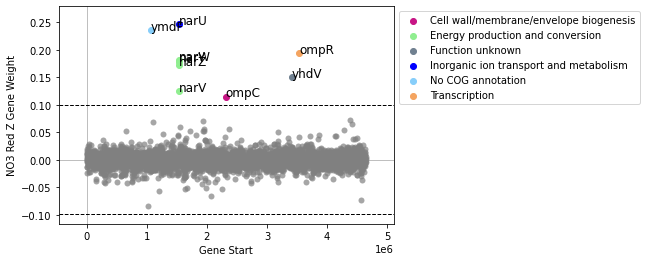

In [201]:
plot_gene_weights(ica_data,iM_to_annotate, adjust_labels=False)

## Compute Regulator Enrichment

In [198]:
ica_data.compute_trn_enrichment(iM_to_annotate, 'CueR', evidence=[1, 2])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [196]:
reg_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=1, evidence=[1, 2], force=True)
reg_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


## Plot Regulator Histogram

In [ ]:
plot_regulon_histogram(ica_data, iM_to_annotate, reg_enrichment.loc[0, 'regulator'])

## Show Genes

In [165]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b1112,0.301343,bhsA,NaN,1169073,1169330,+,DUF1471 domain-containing multiple stress resi...,Cell wall/membrane/envelope biogenesis,P0AB40,"Crp,RpoE,ComR,RpoD",257
b1926,0.093226,fliT,NaN,2005713,2006078,+,flagellar biosynthesis protein FliT,Transcription,P0ABY2,"RpoD,FlhDC,FliA",365
b0066,-0.103311,thiQ,NaN,72229,72927,-,thiamine ABC transporter ATP binding subunit,Inorganic ion transport and metabolism,P31548,"RpoD,SgrR,ppGpp,DksA",698
b1943,-0.104782,fliK,NaN,2018386,2019513,+,flagellar hook-length control protein,Cell motility,P52614,"RpoD,FliA,FlhDC,CsgD",1127
b2102,-0.105022,yegX,NaN,2182833,2183651,-,putative hydrolase,Cell wall/membrane/envelope biogenesis,P76421,NaN,818
b0067,-0.136940,thiP,NaN,72911,74521,-,thiamine ABC transporter membrane subunit,Inorganic ion transport and metabolism,P31549,"RpoD,SgrR,ppGpp,DksA",1610
b1942,-0.146901,fliJ,NaN,2017946,2018389,+,flagellar biosynthesis protein FliJ,Cell motility,P52613,"RpoD,FliA,FlhDC,CsgD",443
b0068,-0.147216,thiB,NaN,74497,75480,-,thiamine ABC transporter periplasmic binding p...,Inorganic ion transport and metabolism,P31550,"RpoD,SgrR,ppGpp,DksA",983
b2104,-0.242635,thiM,NaN,2184513,2185301,-,hydroxyethylthiazole kinase,Nucleotide transport and metabolism,P76423,Thiamine diphosphate,788
b2103,-0.301113,thiD,NaN,2183716,2184516,-,bifunctional hydroxymethylpyrimidine kinase/ph...,Coenzyme transport and metabolism,P76422,Thiamine diphosphate,800


## Plot iModulon Activities

<AxesSubplot:ylabel='e14-2 iModulon\nActivity'>

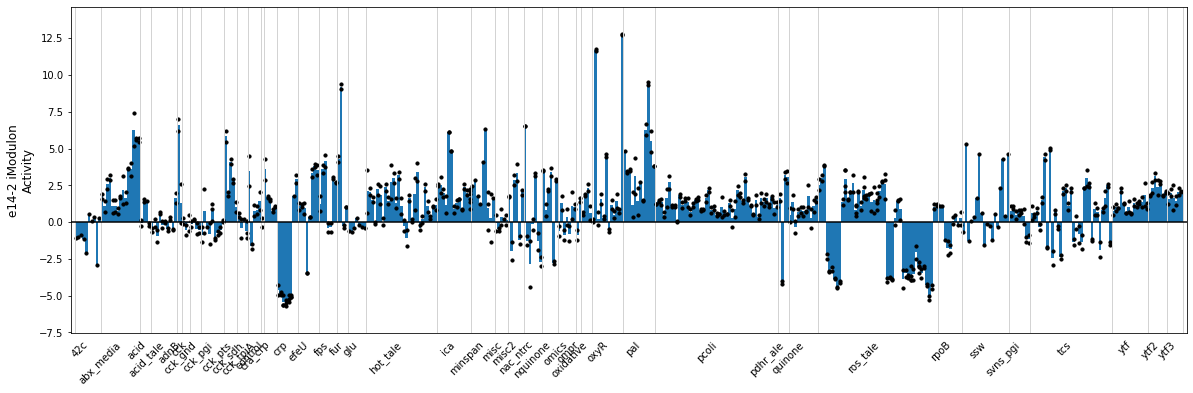

In [179]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

In [153]:
ica_data.view_imodulon(iM_to_annotate).sort_values(by='gene_weight')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
b3807,-0.059930,cyaY,NaN,3993739,3994059,-,frataxin CyaY,Inorganic ion transport and metabolism,P27838,NaN
b4222,-0.049816,ytfP,NaN,4447894,4448235,+,gamma-glutamylamine cyclotransferase family pr...,Function unknown,P0AE48,Nac
b0011,-0.043016,yaaW,NaN,10643,11356,-,putative enzyme-specific chaperone YaaW,Function unknown,P75617,NaN
b4542,-0.042698,yohO,NaN,2215657,2215764,+,UPF0387 family protein YohO,No COG annotation,Q2EES6,Nac
b2207,-0.042539,napD,NaN,2302750,2303013,-,NapA signal peptide-binding chaperone NapD,Inorganic ion transport and metabolism,P0A9I5,"FlhDC,RpoD,IscR,ModE,Fnr,NarP,NarL"
b4157,-0.041102,yjeN,NaN,4385393,4385707,+,protein YjeN,No COG annotation,P39283,NaN
b1838,0.035194,pphA,NaN,1922313,1922969,-,phosphoprotein phosphatase 1,Signal transduction mechanisms,P55798,"RpoS,RpoH"
b3048,0.035529,yqiI,NaN,3190632,3191696,+,putative fimbrial protein YqiI,Cell motility,P76656,RpoS
b4460,0.035717,araH,NaN,1982554,1983540,-,arabinose ABC transporter membrane subunit,Carbohydrate transport and metabolism,P0AE26,"Crp,AraC,RpoS,RpoD"
b4296,0.036067,yjhF,NaN,4520671,4522020,-,KpLE2 phage-like element%3B putative transport...,Inorganic ion transport and metabolism,P39357,NaN


<AxesSubplot:ylabel='SSW-Mut iModulon\nActivity'>

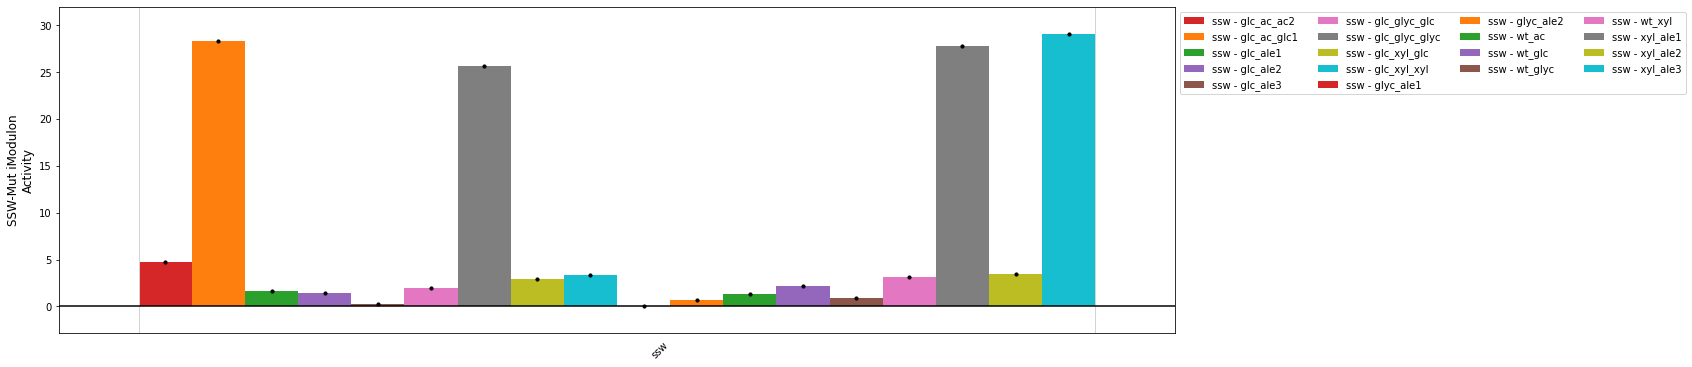

In [151]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='ssw', ax=ax)

In [185]:
ica_data.sample_table.columns

Index(['sample_id', 'study', 'project', 'condition', 'rep_id', 'contact',
       'creator', 'run_date', 'Strain Description', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH',
       'Antibiotic for selection', 'Culture Type', 'Growth Rate (1/hr)',
       'Evolved Sample', 'Isolate Type', 'Sequencing Machine',
       'Additional Details', 'Biological Replicates', 'R1', 'R2', 'BAM',
       'alignment', 'DOI', 'GEO', 'Published', 'SRX', 'Run', 'Notes',
       'LibraryLayout', 'Platform', 'passed_fastqc', 'passed_pct_reads_mapped',
       'passed_reads_mapped_to_CDS', 'passed_global_correlation', 'full_name',
       'passed_similar_replicates', 'passed_number_replicates'],
      dtype='object')

In [26]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['misc2'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
ecoli_00285,misc2__arg_cytd__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00286,misc2__arg_cytd__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00281,misc2__dbcn_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00282,misc2__dbcn_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00832,misc2__dellon_glc__1,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00833,misc2__dellon_glc__2,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00287,misc2__delyheO_pyr__1,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00288,misc2__delyheO_pyr__2,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00279,misc2__salc_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0
ecoli_00280,misc2__salc_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0


## Add iModulon Table to IcaData

In [3]:
imod_table = pd.read_csv('../data/precise2/imodulon_table.csv', index_col=0)
imod_table.head()

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,category,exp_var,trn_enrich_params,note
e14 Removal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,Genomic,0.348726,NaN,NaN
SG_yzfA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,1.0,Other,0.053012,NaN,NaN
SG_ytiD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,Other,0.047134,NaN,NaN
Membrane-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,Biological,0.971942,NaN,Somewhat broad annotation
CysB-1,CysB,0.0,1.980000e-07,0.411765,0.225806,0.291667,7.0,17.0,31,1.0,NaN,Regulatory,0.964488,NaN,NaN


In [4]:
ica_data.rename_imodulons(dict(zip(ica_data.imodulon_names, list(imod_table.index))))

#### Rename Specific iModulon

In [65]:
ica_data.rename_imodulons({'DksA/ppGpp': 'DksA-related', 'Minimal Media': 'UC-1', 'BCAA': 'AA-related'})

In [99]:
ica_data.imodulon_table.to_csv('../data/precise2/imodulon_table.csv')

### Save Table to IcaData

In [5]:
ica_data.imodulon_table = imod_table

In [6]:
save_to_json(ica_data, '../data/precise2/precise2.json', compress=True)

### Rename M and A Raw Files

In [7]:
ica_data.M.to_csv('../data/precise2/M.csv')

In [540]:
m_from_file = pd.read_csv('../data/precise2/M.csv', index_col=0)
m_from_file.columns = imod_table.index
m_from_file.head()

,e14-1,SG_yzfA,SG_ytiD,Membrane-1,CysB-1,HprR+CusR,DLP12/IS3,SG_yqhI,SG_icdC,NQ-ALE3,...,SG_cspH,SG_ymcE,NO3 Red Z,NarL,RpoS+ArgR+RpoN,SG_ybfQ,SG_ynaM,Crp-related-2,Glutathione,SG_sgrT
Geneid,,,,,,,,,,,,,,,,,,,,,
b0002,-0.000358,-0.008590,0.003601,-0.012687,0.005562,-0.008805,0.001628,-0.002981,-0.005618,0.002741,...,0.007893,0.007961,0.006694,-0.007216,-0.012779,0.009632,0.000493,0.000036,-0.021155,-0.011153
b0003,-0.010837,0.001999,0.011521,0.002356,0.005713,-0.004448,-0.006117,0.014313,0.006507,-0.001974,...,-0.011125,-0.002493,0.020232,0.015658,-0.004292,0.004611,0.017251,-0.008580,0.008200,-0.001142
b0004,-0.011196,0.010332,0.010215,0.008323,0.002182,-0.004335,-0.001893,0.002386,0.008030,0.002420,...,-0.006413,-0.000588,0.015639,0.012891,-0.000049,0.008568,0.012664,-0.007649,0.014636,-0.008665
b0005,0.001831,0.008297,-0.006886,0.008113,-0.000454,0.004255,0.031781,-0.000679,0.005952,0.011142,...,-0.011150,0.009998,-0.003796,0.023029,-0.008983,-0.002186,-0.008396,-0.003082,0.001796,-0.007888
b0006,0.009458,-0.002019,0.015016,-0.005517,-0.004051,-0.000016,0.002706,0.005039,0.007791,-0.008338,...,-0.002731,0.002148,0.010465,0.007808,0.002363,0.007910,-0.000523,0.002802,0.011354,-0.002649


In [541]:
m_from_file.to_csv('../data/precise2/M.csv')

In [8]:
ica_data.A.to_csv('../data/precise2/A.csv')

In [542]:
a_from_file = pd.read_csv('../data/precise2/A.csv', index_col=0)
a_from_file.index = imod_table.index
a_from_file.head()

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,ecoli_00836,ecoli_00837,ecoli_00838,ecoli_00839,ecoli_00840,ecoli_00841,ecoli_00842,ecoli_00843,ecoli_00844,ecoli_00845
e14-1,-0.128304,0.128304,-1.531027,-1.963977,-0.303246,-0.062866,-1.375827,-1.600358,-0.164066,-0.281141,...,1.603103,2.218117,2.299468,2.110294,2.100683,2.582940,2.064856,2.209638,1.913363,1.891312
SG_yzfA,-0.152539,0.152539,-2.741850,-1.200373,-1.446482,-1.101239,-1.340625,-0.672756,-0.524996,-0.650100,...,-0.904385,-1.173453,-1.248829,-1.370640,-0.901145,-0.604680,-1.560660,-1.439933,-1.571323,-0.645570
SG_ytiD,0.249185,-0.249185,3.262396,3.948667,0.843348,0.983687,2.730156,2.949588,2.111970,2.283055,...,-0.191715,1.451728,1.210193,1.315993,0.945596,0.988214,0.677923,0.638416,-0.321869,-0.996076
Membrane-1,-0.104403,0.104403,-4.916100,-5.861405,1.058649,1.005977,-3.312421,-3.625048,1.257151,1.107445,...,1.834209,1.838009,3.781963,3.501219,3.430569,3.591516,2.605577,2.886943,2.672993,2.162092
CysB-1,-0.176603,0.176603,3.582368,4.747595,2.041670,1.917720,2.480352,3.153594,2.702293,2.850132,...,1.169348,0.965257,0.153500,0.925511,1.315424,1.119001,1.928577,1.671033,1.921350,2.005877


In [543]:
a_from_file.to_csv('../data/precise2/A.csv')